Stochastic Optimization demo.

In [74]:
import numpy as np
import matplotlib.pyplot as plt

I apply stochastic optimization to the simple 1D problem of minimizing $Bx^2$. With step size h, this results in the gradient descent step:

$$x_i = (1-hB)x_{i-1}$$

The statistical model used for the x iterates is:

$$x_i = \mu + A(x_{i-1} - \mu) + Z_i$$ 

where $\mu$ is the optimal value of x (which is 0) and $Z_i$ is Gaussian noise. It would make sense that as our posterior updates continually, the mean for $\mu$ should converge to 0, and the mean of $A$ should converge to $1-hB$. Both variances should decrease as we receive more data.

I maintain a dictionary containing the iterates for x, mu, A and Sigma (I don't actually update Sigma in the code below, just keep it constant). mu, A and Sigma are all N\*2 numpy arrays with the first column being the sequence of means for the parameter and the second the sequence of variances.

In [96]:
def Optimize(B, prior_mu, prior_A, prior_sigma, num_iterations, h):
    
    Iterates_dict = {}
    Iterates_dict["x"] = np.zeros(num_iterations)
    Iterates_dict["x"][0] = 0.5
    Iterates_dict["mu"] = np.zeros((num_iterations, 2))
    Iterates_dict["mu"][0] = prior_mu
    Iterates_dict["A"] = np.zeros((num_iterations, 2))
    Iterates_dict["A"][0] = prior_A
    Iterates_dict["Sigma"] = np.zeros((num_iterations, 2))
    Iterates_dict["Sigma"][0] = prior_sigma
    
    
    for i in range(1, num_iterations):
        x_prev = Iterates_dict["x"][i-1]
        x_curr = (1 - h*B)*x_prev
        Iterates_dict["x"][i] = x_curr
        
        mu = Iterates_dict["mu"][i-1]
        A = Iterates_dict["A"][i-1]
        Sigma = Iterates_dict["Sigma"][i-1]
        Iterates_dict["mu"][i] = mu
        Iterates_dict["A"][i] = A
        Iterates_dict["Sigma"][i] = Sigma
        
        # Switch between updating mu and updating A. First line is posterior mean update, second line is posterior variance
        # update.
        Iterates_dict["mu"][i, 0] = (Sigma[0]*mu[0] + mu[1]*A[1]*x_prev + mu[1]*(1-A[0])*(x_curr - A[0]*x_prev))/(Sigma[0]+mu[1]*A[1]+mu[1]*(1-A[0])**2)
        Iterates_dict["mu"][i, 1] = (mu[1]*Sigma[0])/(Sigma[0]+mu[1]*A[1]+mu[1]*(1-A[0])**2)
        mu = Iterates_dict["mu"][i]
        
        Iterates_dict["A"][i, 0] = (Sigma[0]*A[0] + A[1]*mu[1] + A[1]*(x_prev-mu[0])*(x_curr-mu[0]))/(Sigma[0]+A[1]*mu[1]+A[1]*(x_prev-mu[0])**2)
        Iterates_dict["A"][i, 1] = (A[1]*Sigma[0])/(Sigma[0]+A[1]*mu[1]+A[1]*(x_prev-mu[0])**2)
            
    return Iterates_dict

In [122]:
B = np.random.uniform(0, 1) # optimization objective is Bx^2
h = 0.1
Iterates = Optimize(B, (0.5, 0.1), (0.5, 0.5), (0.5, 0.5), 10000, h) #Priors of mean 0.5, variance 0.5 on all parameters.

We can see how the iterates for x (gradient descent), $\mu$ and $A$ (posterior updating) vary:

In [123]:
print(Iterates["x"])
print(Iterates["mu"])
print(Iterates["A"])
print(Iterates["Sigma"])

[  5.00000000e-001  -3.00000000e-001   1.80000000e-001 ...,
  -4.94065646e-324   4.94065646e-324  -4.94065646e-324]
[[ 0.1         0.1       ]
 [ 0.06923077  0.07692308]
 [ 0.06252634  0.06226351]
 ..., 
 [ 0.00040326  0.00042327]
 [ 0.00040324  0.00042324]
 [ 0.00040322  0.00042322]]
[[ 0.          0.5       ]
 [-0.06505437  0.39604424]
 [-0.04288907  0.34336554]
 ..., 
 [ 0.8592128   0.0442481 ]
 [ 0.85921807  0.04424644]
 [ 0.85922335  0.04424479]]
[[ 0.5  0.5]
 [ 0.5  0.5]
 [ 0.5  0.5]
 ..., 
 [ 0.5  0.5]
 [ 0.5  0.5]
 [ 0.5  0.5]]


And plot how the posterior mean for $\mu$ changes:

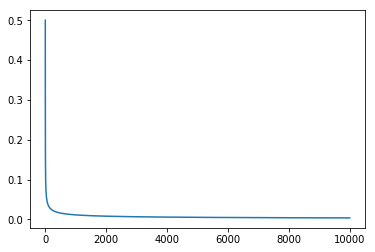

In [59]:
plt.plot(Iterates["mu"][:, 0])

We can also check whether the iterates for $A$ converge to $1-hB$:

In [105]:
1-h*B

-0.6000000000000001

Note: Changing the initial priors seems to affect the behaviour greatly. 

In [89]:
(1-h*B)*0.5

0.32264172007507835